In [90]:
using DrWatson
@quickactivate "Doran_etal_2022"

using Muon, CSV, DataFrames
using NewickTree, NewickTreeTools
using StatsBase
using StatsPlots
theme(:default, grid=false, tickdir=:out, label="")

In [9]:

uniprot = readh5ad(datadir("exp_pro", "UP7047", "2020_02_UP7047.h5ad"))
tdir = projectdir("_research", "UP7047_neighborjoined_spitree")
uptree_full = readnw(readline(joinpath(tdir, "2020_02_UP7047-supporttree.nw")))
uptree = as_polytomy(x->NewickTree.support(x) < 0.5, uptree_full)

((((((((((((((((UP000220251:0.3681296,UP000000495:0.7054831,UP000031552:0.4500539)0.71:0.07324412,UP000001505:0.515416)0.8366666666666667:0.05146068,(UP000000529:0.8304454,UP000069902:0.4625929)0.63:0.132667)0.874:0.0437504,UP000031320:0.5283071)0.975:0.06329066,UP000000496:1.215079)0.9428571428571428:0.1666593,UP000196763:0.3919022)0.8725:0.02545351,UP000253816:0.1724787,UP000000431:0.3050015)0.866:0.01776252,UP000196862:0.3726263,UP000196784:0.2678048)0.9575:0.07027833,UP000185544:0.591453)0.8838461538461538:0.01360717,UP000218046:0.4953882,UP000053785:0.4936864)0.766:0.004803309,((((UP000035039:0.345209,UP000029283:1.035116)0.77:0.08784236,UP000035018:0.5590247)0.885:0.2052429,UP000053697:0.3172342)0.7433333333333334:0.03277148,UP000242542:0.4476391)0.6775:0.03476413,(UP000195277:0.593108,UP000242922:0.662811)0.56:0.04725994)0.5272727272727273:0.00202137,(((((((((((((((((UP000002523:1.000336,UP000008323:0.05665735)0.89:0.2533052,UP000283896:0.0)1.0:0.206037,UP000037386:0.07790443)1.

In [39]:
pdir = plotsdir("quickquestions") |> mkpath
ddir = datadir("exp_pro", "BB669")
biobank = readh5mu(joinpath(ddir, "BB669.h5mu"))

┌ Warning: Cannot join columns with the same name because var_names are intersecting.
└ @ Muon /Users/ben/.julia/packages/Muon/eLqpV/src/mudata.jl:351


MuData object 669 ✕ 21485
└ metabolites_foldchange
  AnnData object 669 ✕ 50
└ metabolites_millimolar
  AnnData object 669 ✕ 10
└ UPorder_oggs
  AnnData object 669 ✕ 10177
└ oggs
  AnnData object 669 ✕ 11248

1. How many different species are there in CSB? 
    A: 66 specific species + 33 strains that are unclassified at the species level
2. How many strains of B. Uniformis and R. gnavus are there in fig. 2a? 
    A:  N_uniformis=27 and N_gnavus=41
3. How many OGGs are significantly differentially abundant across StrVar|UniProt?  
    A: 5,006/5,449 were significant at some node in the tree
4. How many strains are in StrVar|UniProt? 
    A: 356 strains
5. In Fig. 3D, what is the highest percentage that you see a phage-suppressed OGG get up to with respect to fractional abundance (highest y-value for a blue circle?) 
    A: in 3D 81.7% (if we include E. rectale at the full uniprot level it rises to 87.1%)

In [40]:
unique(biobank.obs.species)

67-element Vector{String}:
 "Bacteroides eggerthii"
 "Bacteroides fragilis"
 "Phocaeicola vulgatus"
 "Bacteroides caccae"
 "Bacteroides thetaiotaomicron"
 "Bacteroides xylanisolvens"
 "Bacteroides ovatus"
 "Coprococcus comes"
 "Dorea formicigenerans"
 "Dorea longicatena"
 ⋮
 "Bifidobacterium bifidum"
 "Bacteroides stercoris"
 "Bacteroides faecis"
 "Bacteroides dorei"
 "Bariatricus massiliensis"
 "Escherichia fergusonii"
 "Enterocloster bolteae"
 "Faecalimonas umbilicata"
 "Odoribacter splanchnicus"

In [44]:
ncbi_species = deepcopy(biobank.obs.species_ncbi)
ncbi_species[occursin.(r"[\.\_\-]", biobank.obs.species_ncbi)] .= "unclassified"
sort(countmap(ncbi_species), byvalue=true, rev=true)

OrderedCollections.OrderedDict{String, Int64} with 67 entries:
  "Phocaeicola vulgatus"            => 93
  "[Ruminococcus] gnavus"           => 41
  "Bacteroides thetaiotaomicron"    => 35
  "unclassified"                    => 33
  "Anaerostipes hadrus"             => 31
  "Bacteroides uniformis"           => 27
  "Blautia wexlerae"                => 26
  "Bifidobacterium breve"           => 24
  "Dorea formicigenerans"           => 23
  "Coprococcus comes"               => 23
  "[Eubacterium] rectale"           => 20
  "Fusicatenibacter saccharivorans" => 20
  "Parabacteroides distasonis"      => 19
  "Bacteroides eggerthii"           => 18
  "Prevotella copri"                => 14
  "Dorea longicatena"               => 14
  "Blautia massiliensis"            => 13
  "Mediterraneibacter faecis"       => 13
  "Anaerostipes caccae"             => 12
  ⋮                                 => ⋮

In [46]:
length(unique(ncbi_species)) - 1

66

In [47]:
sort(countmap(biobank.obs.species), byvalue=true, rev=true)

OrderedCollections.OrderedDict{String, Int64} with 67 entries:
  "Phocaeicola vulgatus"            => 88
  "[Ruminococcus] gnavus"           => 41
  "Bacteroides thetaiotaomicron"    => 35
  "Anaerostipes hadrus"             => 31
  "Bacteroides uniformis"           => 27
  "unclassified"                    => 26
  "Blautia luti"                    => 24
  "Bifidobacterium breve"           => 24
  "Coprococcus comes"               => 23
  "Dorea formicigenerans"           => 22
  "Blautia wexlerae"                => 21
  "[Eubacterium] rectale"           => 20
  "Fusicatenibacter saccharivorans" => 19
  "Parabacteroides distasonis"      => 19
  "Bacteroides eggerthii"           => 18
  "Prevotella copri"                => 14
  "Mediterraneibacter faecis"       => 13
  "Anaerostipes caccae"             => 12
  "Dorea longicatena"               => 11
  ⋮                                 => ⋮

In [101]:
fullresults = CSV.read(projectdir("_research/donor_strainlevel_variation/full_ogg_wilcoxon_testresults_on_big10species.csv"), DataFrame);

In [50]:
sigresults = CSV.read(projectdir("_research/donor_strainlevel_variation/significant_Qbh_ogg_wilcoxon_testresults_on_big10species.csv"), DataFrame);
size(sigresults)

(24890, 26)

In [98]:
freq_sig = collect(values(countmap(sigresults.ogg_name)));

In [99]:
median(freq_sig)

4.0

In [100]:
maximum(freq_sig)

29

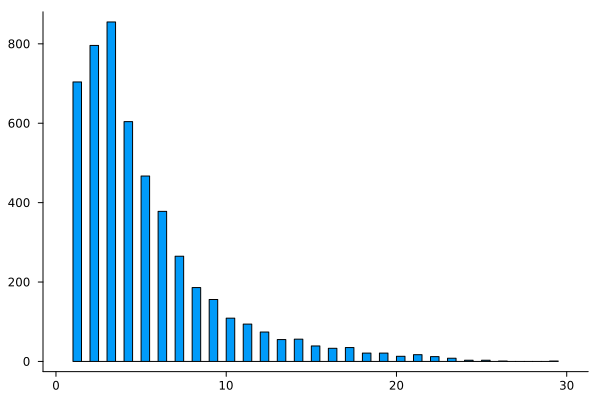

In [96]:
histogram(collect(values(countmap(sigresults.ogg_name))))

In [86]:
length(unique(sigresults.nodeids)) * 5_449

523104

In [87]:
24890 / 523104

0.04758136049428029

In [129]:
CSBstrainlevelsig = filter(:tree_level => ==("strain level"), sigresults) |>
    # df -> filter(:logeffectsize => >(1), df) |>
    # df -> filter(:effectsize => >(1), df) |>
    df -> filter(:log2FC => x->abs.(x) .> 1 , df);

In [135]:
leftjoin(CSBstrainlevelsig, uniprot.var; on= :ogg_name => :og) |>
    df -> sort(df,[:nodeids, :log2FC]) |>
    df -> select(df, [:nodeids, :nodedepth, :tree_level, :grp1_N, :grp2_N, :grp1_species_mode, :ogg_name, :log2FC, :qvals, :qval_BH, :COG_categories, :description]) |>
    df -> rename(df, 
        :nodeids => :nodeID,
        :grp1_species_mode => :species,
    ) |>
    df -> CSV.write(projectdir("_research/donor_strainlevel_variation/significant_strainlevel_Qbh_ogg_wilcoxon_testresults_on_big10species.tsv"), df; delim="\t")

"/Users/ben/projects/Doran_etal_2022/_research/donor_strainlevel_variation/significant_strainlevel_Qbh_ogg_wilcoxon_testresults_on_big10species.tsv"

In [121]:
filter(!isnothing, indexin(CSBstrainlevelsig.ogg_name, uniprot.var_names))

869-element Vector{Union{Nothing, Int64}}:
  633
 1802
 3233
 4516
 4662
 4720
 4772
 5310
 6680
 9367
    ⋮
 1440
 1666
 1802
 2611
 2653
 2697
 2868
 3884
 4166

answers the the listed questions 

1. How many different species are there in CSB? 
    A: 66 specific species + 33 strains that are unclassified at the species level
2. How many strains of B. Uniformis and R. gnavus are there in fig. 2a? 
    A:  N_uniformis=27 and N_gnavus=41
3. How many OGGs are significantly differentially abundant across StrVar|UniProt?  
    A: 5,006/5,449 were significant at some node in the tree
    24,890/523,104 tests are significant (4.7% of tests)
    half of OGGs are significant in less than 5 nodes (median=4) (maximum=29) of the 96 nodes tested
    1229 tests that are Q_bh < 0.05 && log2FC > 1 and at the strain level
    869 that are also in UniProt
4. How many strains are in StrVar|UniProt? 
    A: 356 strains
5. In Fig. 3D, what is the highest percentage that you see a phage-suppressed OGG get up to with respect to fractional abundance (highest y-value for a blue circle?) 
    A: in 3D 81.7% (if we include E. rectale at the full uniprot level it rises to 87.1%)

In [52]:
unique(sigresults.ogg_name)

5006-element Vector{String15}:
 "32EMM"
 "2Z7HS"
 "2Z7I5"
 "2Z7ID"
 "2Z7IJ"
 "2Z7IQ"
 "2Z7IU"
 "2Z7IY"
 "2Z7J3"
 "2Z7JA"
 ⋮
 "30DF7"
 "30IZ3"
 "COG4573"
 "32707"
 "336V8"
 "33ASS"
 "32XXG"
 "32YCY"
 "32Z1B"

In [53]:
keptspecies = string.(keys(sort(filter(x-> last(x) > 19, countmap(biobank.obs.species)), byvalue=true, rev=true)))
filter!(!=("unclassified"), keptspecies)
full_train_mask = in.(biobank.obs.species, Ref(keptspecies));
full_test_mask = .!(full_train_mask);

In [54]:
sum(full_train_mask)

356

In [80]:
chosen_oggs = [
    # erectale
    ["COG0835", "COG0842", "COG1345", "COG1344", "COG1442",
    "COG1516", "COG1776", "COG2186", "COG2198", "COG2405", 
    "COG2865", "COG2944", "COG3210", "COG3316", "COG3547", 
    "COG4495", "COG4786", "COG5001", "COG5279", "COG5444",],
    # gnavus
    ["COG1440","COG1447",],
    ["COG1694",],
    ["COG0531","COG1501","COG2222",],
    # comes
    ["COG0145","COG1011","COG1351","COG4951","2Z81G",],
    # vulgatus
    ["COG0863","COG1083","COG4744",],
    ["32ZV1",],
    ["COG0666","COG2214","2Z8QV",],
    # thetaiotaomicron
    ["COG1474","COG2942","COG3410",],
];
allcomplementoggnames = vcat(chosen_oggs...)
maximum(vec(mapslices(x->mean(x.>0), uniprot.X[:,:][:, indexin(allcomplementoggnames, uniprot.var_names)], dims=1)))

0.8711508443309209

In [81]:
chosen_oggs = [
    # erectale
    # ["COG0835", "COG0842", "COG1345", "COG1344", "COG1442",
    # "COG1516", "COG1776", "COG2186", "COG2198", "COG2405", 
    # "COG2865", "COG2944", "COG3210", "COG3316", "COG3547", 
    # "COG4495", "COG4786", "COG5001", "COG5279", "COG5444",],
    # gnavus
    ["COG1440","COG1447",],
    ["COG1694",],
    ["COG0531","COG1501","COG2222",],
    # comes
    ["COG0145","COG1011","COG1351","COG4951","2Z81G",],
    # vulgatus
    ["COG0863","COG1083","COG4744",],
    ["32ZV1",],
    ["COG0666","COG2214","2Z8QV",],
    # thetaiotaomicron
    ["COG1474","COG2942","COG3410",],
];
allcomplementoggnames = vcat(chosen_oggs...)
maximum(vec(mapslices(x->mean(x.>0), uniprot.X[:,:][:, indexin(allcomplementoggnames, uniprot.var_names)], dims=1)))

0.8173690932311622

In [136]:
strvarsig = CSV.read(projectdir("_research/donor_strainlevel_variation/significant_strainlevel_Qbh_ogg_wilcoxon_testresults_on_big10species.tsv"), DataFrame; delim="\t")

Row,nodeID,nodedepth,tree_level,grp1_N,grp2_N,species,ogg_name,log2FC,qvals,qval_BH,COG_categories,description
,Int64,Float64,String15,Int64,Int64,String31,String7,Float64,Float64,Float64,String3?,String?
1,4,1.59622,strain level,4,23,Bacteroides uniformis,COG0639,-1.26605,0.0,0.0,T,phosphoprotein phosphatase activity
2,4,1.59622,strain level,4,23,Bacteroides uniformis,COG2114,1.18872,0.0,0.0,T,Pfam Adenylate and Guanylate cyclase catalytic domain
3,4,1.59622,strain level,4,23,Bacteroides uniformis,32XDC,1.18872,0.0,0.0,missing,missing
4,4,1.59622,strain level,4,23,Bacteroides uniformis,33PT8,1.18872,0.0,0.0,missing,missing
5,4,1.59622,strain level,4,23,Bacteroides uniformis,313XW,1.29248,0.0,0.0,missing,missing
6,4,1.59622,strain level,4,23,Bacteroides uniformis,33PPE,1.39524,0.0,0.0,missing,missing
7,4,1.59622,strain level,4,23,Bacteroides uniformis,30MKT,1.5,0.0,0.0,missing,missing
8,4,1.59622,strain level,4,23,Bacteroides uniformis,347JS,1.5,0.0,0.0,missing,missing
9,4,1.59622,strain level,4,23,Bacteroides uniformis,COG4096,1.54148,0.0,0.0,L,type I site-specific deoxyribonuclease activity


In [137]:
filter(:description => !ismissing, strvarsig) |> 
    df -> CSV.write(projectdir("_research/donor_strainlevel_variation/Annotated_significant_strainlevel_Qbh_ogg_wilcoxon_testresults_on_big10species.tsv"), df, delim="\t")

"/Users/ben/projects/Doran_etal_2022/_research/donor_strainlevel_variation/Annotated_significant_strainlevel_Qbh_ogg_wilcoxon_testresults_on_big10species.tsv"